# 🌟Data preprocessing for Stable Diffusion book cover generation training🌟

In [4]:
import numpy as np
import pandas as pd
import cv2 
import os
import matplotlib.pyplot as plt
try:
  from google.colab import drive
  drive.mount("/content/drive",force_remount=True)
except:
  pass
# path='/Users/eden/Downloads/book dataset'
path="./book dataset"

## 1.Finding a proper(mean) size to resize all images to.
I expect this to minimize quality loss due to resizing interpolation(bilinear, bicubic, etc.)

[ WARN:0@288.209] global loadsave.cpp:244 findDecoder imread_('./book dataset/images/images/252.jpg'): can't open/read file: check file path/integrity
[ WARN:0@294.003] global loadsave.cpp:244 findDecoder imread_('./book dataset/images/images/2051.jpg'): can't open/read file: check file path/integrity
[ WARN:0@299.529] global loadsave.cpp:244 findDecoder imread_('./book dataset/images/images/3788.jpg'): can't open/read file: check file path/integrity
[ WARN:0@311.329] global loadsave.cpp:244 findDecoder imread_('./book dataset/images/images/7594.jpg'): can't open/read file: check file path/integrity
[ WARN:0@314.717] global loadsave.cpp:244 findDecoder imread_('./book dataset/images/images/8669.jpg'): can't open/read file: check file path/integrity
[ WARN:0@315.186] global loadsave.cpp:244 findDecoder imread_('./book dataset/images/images/8815.jpg'): can't open/read file: check file path/integrity
[ WARN:0@318.430] global loadsave.cpp:244 findDecoder imread_('./book dataset/images/imag

Successfully read 53460 images , failed to read 841 images


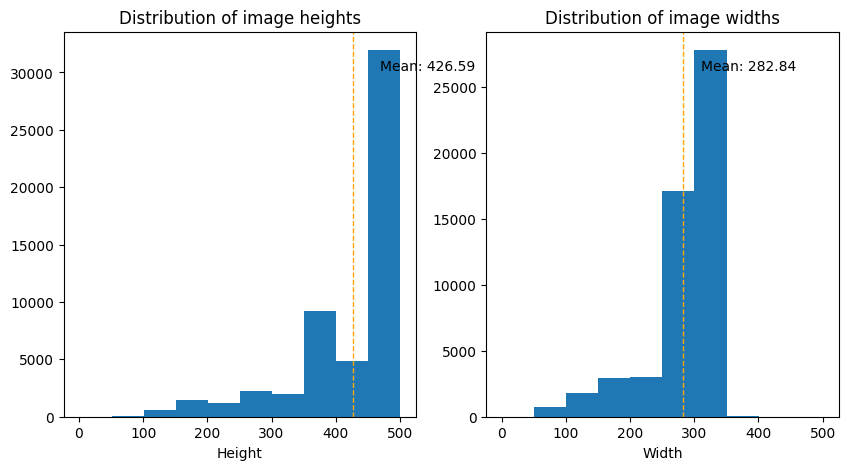

Failed images:  [252, 2051, 2833, 3328, 3788, 6147, 7594, 8167, 8619, 8669, 8815, 9307, 9587, 9861, 9887, 9892, 10012, 10021, 10244, 10428, 10684, 10770, 10909, 11021, 11271, 12172, 12376, 12441, 12544, 12833, 13457, 13547, 13582, 13905, 14001, 14115, 14417, 14798, 15141, 15287, 15882, 16092, 16096, 16099, 16122, 16123, 16131, 16182, 16194, 16204, 16243, 16253, 16270, 16272, 16287, 16320, 16414, 16448, 16464, 16488, 16490, 16499, 16534, 16536, 16539, 16595, 16600, 16665, 16672, 16694, 16726, 16808, 16863, 16916, 16964, 16980, 17043, 17047, 17098, 17118, 17122, 17127, 17128, 17140, 17166, 17169, 17222, 17268, 17278, 17284, 17302, 17325, 17372, 17408, 17432, 17534, 17612, 17637, 17683, 17701, 17727, 17758, 17820, 17824, 17870, 17890, 17964, 17969, 17993, 18035, 18077, 18117, 18242, 18271, 18333, 18368, 18369, 18441, 18505, 18532, 18584, 18592, 18817, 18830, 18951, 19011, 19067, 19141, 19157, 19165, 19195, 19400, 19469, 19513, 19547, 19611, 19706, 19728, 19773, 19785, 19788, 19815, 19827,

In [5]:
heights=[]
widths=[]
#path of dataset on my local computer
img_path=path+"/images/images"

df=pd.read_csv(os.path.join(path,"book_data.csv"))
num_failed=0
failed_indices=[]
num_images_before=len(df)
num_deleted=158
#
# import sys
# raw_stream=sys.stdout
# sys.stdout=open('opencv_error.txt','wb')
for index in range(len(df)):
    sub_path=os.path.join(img_path,str(index)+'.jpg')
    try:
        img=cv2.imread(sub_path)
        heights.append(img.shape[0])
        widths.append(img.shape[1])
    except AttributeError:
        failed_indices.append(index)
        df.drop(index,axis=0,inplace=True)
        num_failed+=1
# sys.stdout=raw_stream#restore

print("Successfully read {} images".format(len(heights)),", failed to read {} images".format(num_failed))
# print(f'Number of images before deleting failed images:{num_images_before}\
#     \nNumber of images after { len(os.listdir(img_path)) } ')


fig,axes=plt.subplots(1,2,figsize=(10,5))

#plot 1
axes[0].set(xlabel='Height')
axes[0].hist(heights); axes[0].set(title='Distribution of image heights')
#draw vertical line
axes[0].axvline(np.mean(heights), color='orange', linestyle='dashed', linewidth=1)
axes[0].text(np.mean(heights)*1.1, axes[0].get_ylim()[1]*0.9, 'Mean: {:.2f}'.format(np.mean(heights)))

#plot 2
axes[1].set(xlabel='Width')
axes[1].hist(widths); axes[1].set(title='Distribution of image widths')
axes[1].axvline(np.mean(widths), color='orange', linestyle='--', linewidth=1)
axes[1].text(np.mean(widths)*1.1, axes[1].get_ylim()[1]*0.9, 'Mean: {:.2f}'.format(np.mean(widths)))
plt.show()

print("Failed images: ",failed_indices)

### Save data as numpy array for faster loading (will terminate the session at the end)

In [ ]:
# try:
#   from google.colab import runtime
#   import matplotlib.pyplot as plt
#   import tqdm
#   num_images_before=54301
#   size=256
#   stacked_images=np.zeros((num_images_before,size,size,3),dtype="float16")#save memeory. The runtime crashes with float32
#   img_path=path+"/images/images"

#   for index,file in enumerate(tqdm.tqdm(os.listdir(img_path))):
#     img=cv2.imread(os.path.join(img_path,file))
#     img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     img=cv2.resize(img,(size,size),interpolation=cv2.INTER_CUBIC).astype('float16')
#     if index%1000==0:
#       plt.title(str(index)+" images processed!")
#       plt.imshow(img.astype("int16"))
#       # plt.show()
#     #this index has to correspond to the index in the csv file
#     try:
#       stacked_images[int(file.replace('.jpg','')),:,:,:]=img
#     except ValueError:
#       pass
      
#   np.save(os.path.join(path,"stacked_images.npy"),stacked_images)
#   assert os.path.isfile(os.path.join(path,"stacked_images.npy")), "File not saved!"

#   runtime.unassign()#exit
# except:
#   pass

## 2. Preprocess text data

In [6]:
df=pd.read_csv(os.path.join(path,"book_data.csv"))
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


### 2.1 Remove entries whose corresponding image can't be read

In [7]:
len_before=len(df)
df.drop(failed_indices,inplace=True)
# df.drop(0,axis=0,inplace=True)
if len_before-len(failed_indices)==len(df):
    print(f"Successfully dropped {len(failed_indices)} images!")

Successfully dropped 841 images!


In [8]:
#Only use 3 features 
df=df[['book_authors',"book_desc","book_title"]]
print("Number of NaN/None entries\n:",df.isna().sum(axis=0),"\n--------------------------------------")
# print("First 3 null entries:\n",df[df['book_desc'].isnull()].iloc[:3])#isnull treats empty String as non-NaN.
df.dropna(axis=0,inplace=True)
print("Number of NaN/None entries after processing \n ",df.isna().sum())
# print(df[df.isna()])#isna() is True for empty String''
# df.loc[94]
# df.head() 

Number of NaN/None entries
: book_authors       0
book_desc       1073
book_title         0
dtype: int64 
--------------------------------------
Number of NaN/None entries after processing 
  book_authors    0
book_desc       0
book_title      0
dtype: int64


### 2.2. Remove rows with non-English book description

In [9]:
import re
non_English_sentence="34歳無職童貞のニートは無一文で家を追い出され、自分の人生が完全に詰んでいたと気付く。己を後悔していた矢先、彼はトラックに轢かれ呆気なく死んでしまう。ついで目を覚ました場所は――なんと剣と魔法の異世界だった!!ルーデウスと名付けられた赤ん坊として生まれ変わった彼は、「今度こそ本気で生きて行くんだ……！」と後悔しない人生を送ると決意する。前世の知能を活かしたルーデウスは瞬く間に魔術の才能を開花させ、小さな女の子の家庭教師をつけてもらうことに。さらにはエメラルドグリーンの髪を持つ美しいクォーターエルフとの出会い。彼の新たな人生が動き始める。――憧れの人生やり直し型転生ファンタジー、ここに始動！"
sentence="Despite the tumor-shrinking medical miracle that has bought her a few years, Hazel has never been anything but terminal, her final chapter inscribed upon diagnosis. But when a gorgeous plot twist named Augustus Waters suddenly appears at Cancer Kid Support Group, Hazel's story is about to be completely rewritten.Insightful, bold, irreverent, and raw, The Fault in Our Stars is award-winning author John Green's most ambitious and heartbreaking work yet, brilliantly exploring the funny, thrilling, and tragic business of being alive and in love."
filter=re.compile('[^A-Za-z0-9.,\/#!$%\^\;:{}=\-_`~()\'\" ]*')
def remained_percent(sentence):
    """Return how much percentage of the text is filtered out
    by the regex matching English words and punctuations"""
    sub=filter.sub(repl="",string=sentence)

    return len(sub)/len(sentence)
print("non-English:",remained_percent(non_English_sentence))
print('English',remained_percent(sentence))
# re.sub(pattern=r"""<\|startoftext\|>|<\|endoftext\|>|'s|'t|'re|'ve|'m|'ll|'d|[\p{L}]+|[\p{N}]|[^\s\p{L}\p{N}]+""",repl='',string=sentence)

non-English: 0.013422818791946308
English 1.0


### 2.3 Drop non-English-like data points according to threshold and save two subsets

In [10]:
#Apply over the whole dataframe
drop_threshold=0.97

df['percent_remained']=df['book_desc'].apply(remained_percent)
print("Mean percentage remained after applying filter:",df['percent_remained'].mean())
dropped=df[df['percent_remained']<drop_threshold]
df_remained=df[df['percent_remained']>=drop_threshold]
print('Number of dropped data points:',len(dropped))
#save data
dropped.to_csv(os.path.join(path,"dropped_non_English.csv"))
df_remained.to_csv(os.path.join(path,"df_remained.csv"))
df_remained.head()

Mean percentage remained after applying filter: 0.9706589098899069
Number of dropped data points: 3515


,book_authors,book_desc,book_title,percent_remained
0,Suzanne Collins,Winning will make you famous. Losing means cer...,The Hunger Games,1.000000
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix,0.996333
2,Harper Lee,The unforgettable novel of a childhood in a sl...,To Kill a Mockingbird,1.000000
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,Pride and Prejudice,0.986854
4,Stephenie Meyer,About three things I was absolutely positive.F...,Twilight,0.996416


In [11]:
print("remaining data points: ",len(df_remained))
df_dropped=df_remained.drop('percent_remained',axis=1)
df_train,df_test=(df_dropped.iloc[:-10000],df_dropped.iloc[-10000:])
print(len(df_train),len(df_test))
df_train.to_csv(os.path.join(path,"df_train.csv"))
df_test.to_csv(os.path.join(path,"df_test.csv"))

remaining data points:  48872
38872 10000


In [12]:
# Test whether all test/train images can be read
import glob,os,pandas as pd
df_names=["df_train.csv","df_test.csv"]
for name in df_names:
  print(f"Testing {name}")
  df=pd.read_csv(f"./book dataset/{name}")
  df.head() 
  null_list=[] 
  good_list=[]
  for index in df[df.columns[0]]:
    try:
      file=str(index)+".jpg"
      os.path.isfile(os.path.join(path+"/images/images/",file))
      good_list.append(file)
    except:
      null_list.append(file)
  print(f"len(null_list):{len(null_list)},null_list={null_list}")
  print("------------------------------------------------------------------------------------------")

Testing df_train.csv
len(null_list):0,null_list=[]
------------------------------------------------------------------------------------------
Testing df_test.csv
len(null_list):0,null_list=[]
------------------------------------------------------------------------------------------
